 # Домашнее задание 4 | Линейная и логистическая регрессия

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('C:/Users/AcerA3/datasets/diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Задание 1 (1 балл): загрузка данных и удаление выбросов

In [10]:
# Построю график "ящик с усами" для переменных depth, x, y, z, carat

<AxesSubplot:>

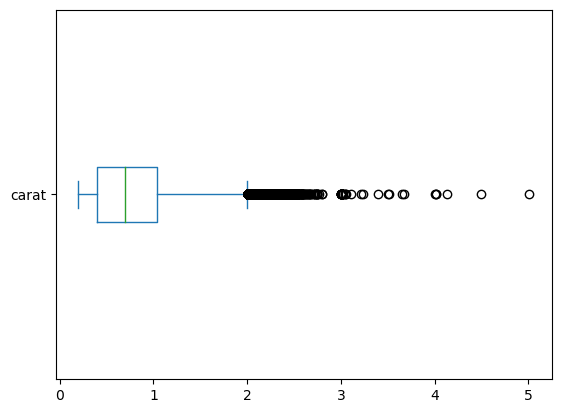

In [11]:
df['carat'].plot(kind='box', vert=False)

<AxesSubplot:>

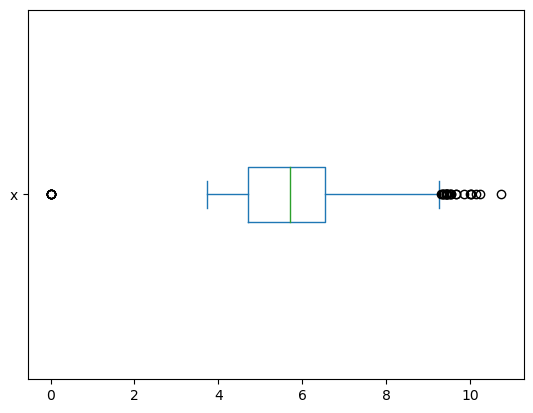

In [12]:
df['x'].plot(kind='box', vert=False)

<AxesSubplot:>

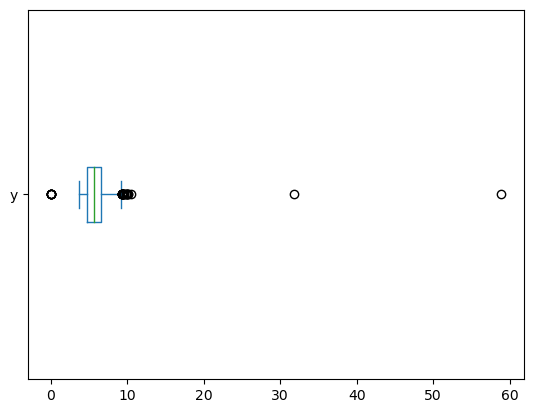

In [13]:
df['y'].plot(kind='box', vert=False)

<AxesSubplot:>

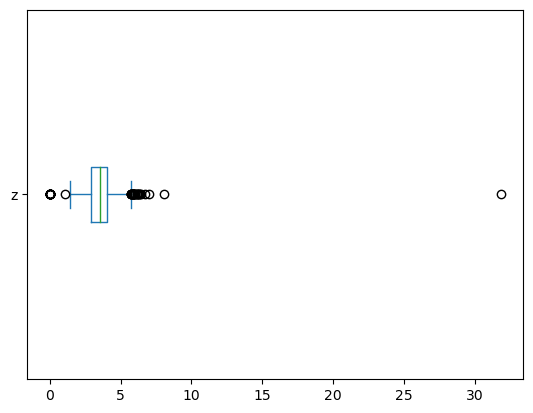

In [14]:
df['z'].plot(kind='box', vert=False)

<AxesSubplot:>

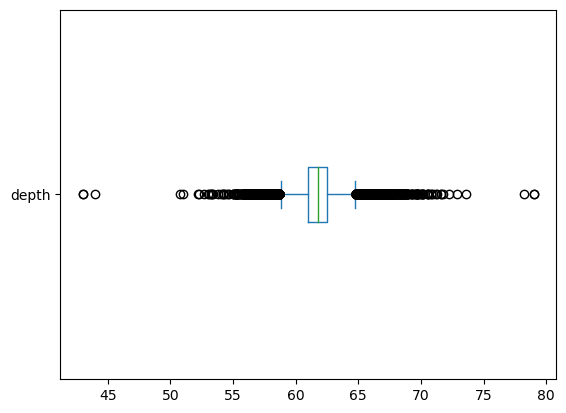

In [15]:
df['depth'].plot(kind='box', vert=False)

In [16]:
# Во всех исследуемых переменных имеются выбросы. Избавлюсь от выбросов методом интерквартильного размаха

In [17]:
# Для переменной Carat
# Нахожу интерквартильный размах
iqr_carat= df['carat'].quantile(0.75)-df['carat'].quantile(0.25)
iqr_carat 

0.64

In [18]:
# Найду границы интервала, все значения за пределами которого буду считаться выбросами
high_carat = df['carat'].quantile(0.75)+iqr_carat*1.5
high_carat

2.0

In [19]:
# Для переменной X
# Нахожу интерквартильный размах
iqr_x = df['x'].quantile(0.75)-df['x'].quantile(0.25)
iqr_x

1.83

In [20]:
# Найду границы интервала, все значения за пределами которого будут считаться выбросами
high_x = df['x'].quantile(0.75)+iqr_x*1.5
high_x

9.285

In [21]:
low_x = df['x'].quantile(0.25)-iqr_x*1.5
low_x

1.9649999999999999

In [22]:
# Для переменной Y
# Нахожу интерквартильный размах
iqr_y= df['y'].quantile(0.75)-df['y'].quantile(0.25)
iqr_y

1.8200000000000003

In [23]:
# Найду границы интервала, все значения за пределами которого буду считаться выбросами
high_y = df['y'].quantile(0.75)+iqr_y*1.5
high_y

9.27

In [24]:
low_y = df['y'].quantile(0.25)-iqr_y*1.5
low_y

1.9899999999999993

In [25]:
# Для переменной Z
# Нахожу интерквартильный размах
iqr_z= df['z'].quantile(0.75)-df['z'].quantile(0.25)
iqr_z

1.13

In [26]:
# Найду границы интервала, все значения за пределами которого буду считаться выбросами
high_z = df['z'].quantile(0.75)+iqr_z*1.5
high_z

5.734999999999999

In [27]:
low_z = df['z'].quantile(0.25)-iqr_z*1.5
low_z

1.2150000000000003

In [28]:
# Для переменной depth
# Нахожу интерквартильный размах
iqr_depth= df['depth'].quantile(0.75)-df['depth'].quantile(0.25)
iqr_depth

1.5

In [29]:
# Найду границы интервала, все значения за пределами которого буду считаться выбросами
high_depth = df['depth'].quantile(0.75)+iqr_depth*1.5
high_depth

64.75

In [30]:
low_depth= df['depth'].quantile(0.25)-iqr_depth*1.5
low_depth

58.75

In [31]:
# удалю выбросы из датафрейма путем фильтрации и сохранения новой таблицы в новую переменную

In [32]:
df1 = df[(df['carat']<=high_carat) & ((df['x']<=high_x) & (df['x']>=low_x)) & ((df['y']<=high_y) & (df['y']>=low_y)) & ((df['z']<=high_z) & (df['z']>=low_z)) & ((df['depth']<=high_depth) & (df['depth']>=low_depth))]
df1.shape

(49666, 11)

In [33]:
# Проверю таблицу на наличие пропущенных значений
df1.isna().sum()

# пропущенных значений нет

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

df1

## Задание 2 (1 балл): исследуем предпосылки к применению линейной модели

Построю тепловую карту используя sns.heatmap 

есть ли линейная связь между ценой и какими-либо регрессорами?
есть ли мультиколлинеарность между регрессорами?

In [34]:
# Построю тепловую карту используя sns.heatmap
import seaborn as sns


In [35]:
# Для начала построю матрицу корреляции
corr_data = df1[[
    'price', 'depth', 'x', 'y', 'z']].corr()
corr_data

,price,depth,x,y,z
price,1.000000,-0.002626,0.874261,0.875719,0.871336
depth,-0.002626,1.000000,-0.017127,-0.018548,0.083178
x,0.874261,-0.017127,1.000000,0.998628,0.993737
y,0.875719,-0.018548,0.998628,1.000000,0.993589
z,0.871336,0.083178,0.993737,0.993589,1.000000


<AxesSubplot:>

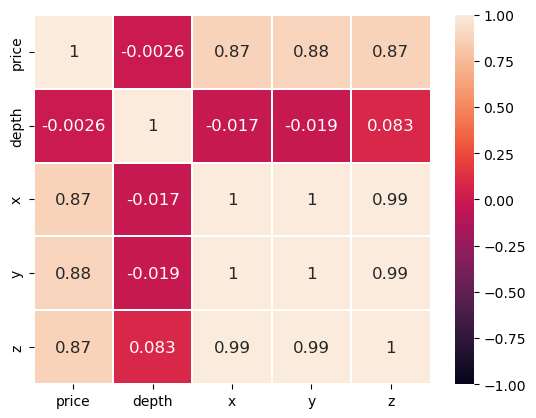

In [36]:
sns.heatmap(
    corr_data,
    linewidths = 0.3, 
    annot = True, 
    vmax = 1, 
    vmin = -1, 
    linecolor = "white",  
    annot_kws = {'size': 12}
)

In [37]:
# Значительная корреляция прослеживается между целевой переменной "price" и регрессорами x, y, z.

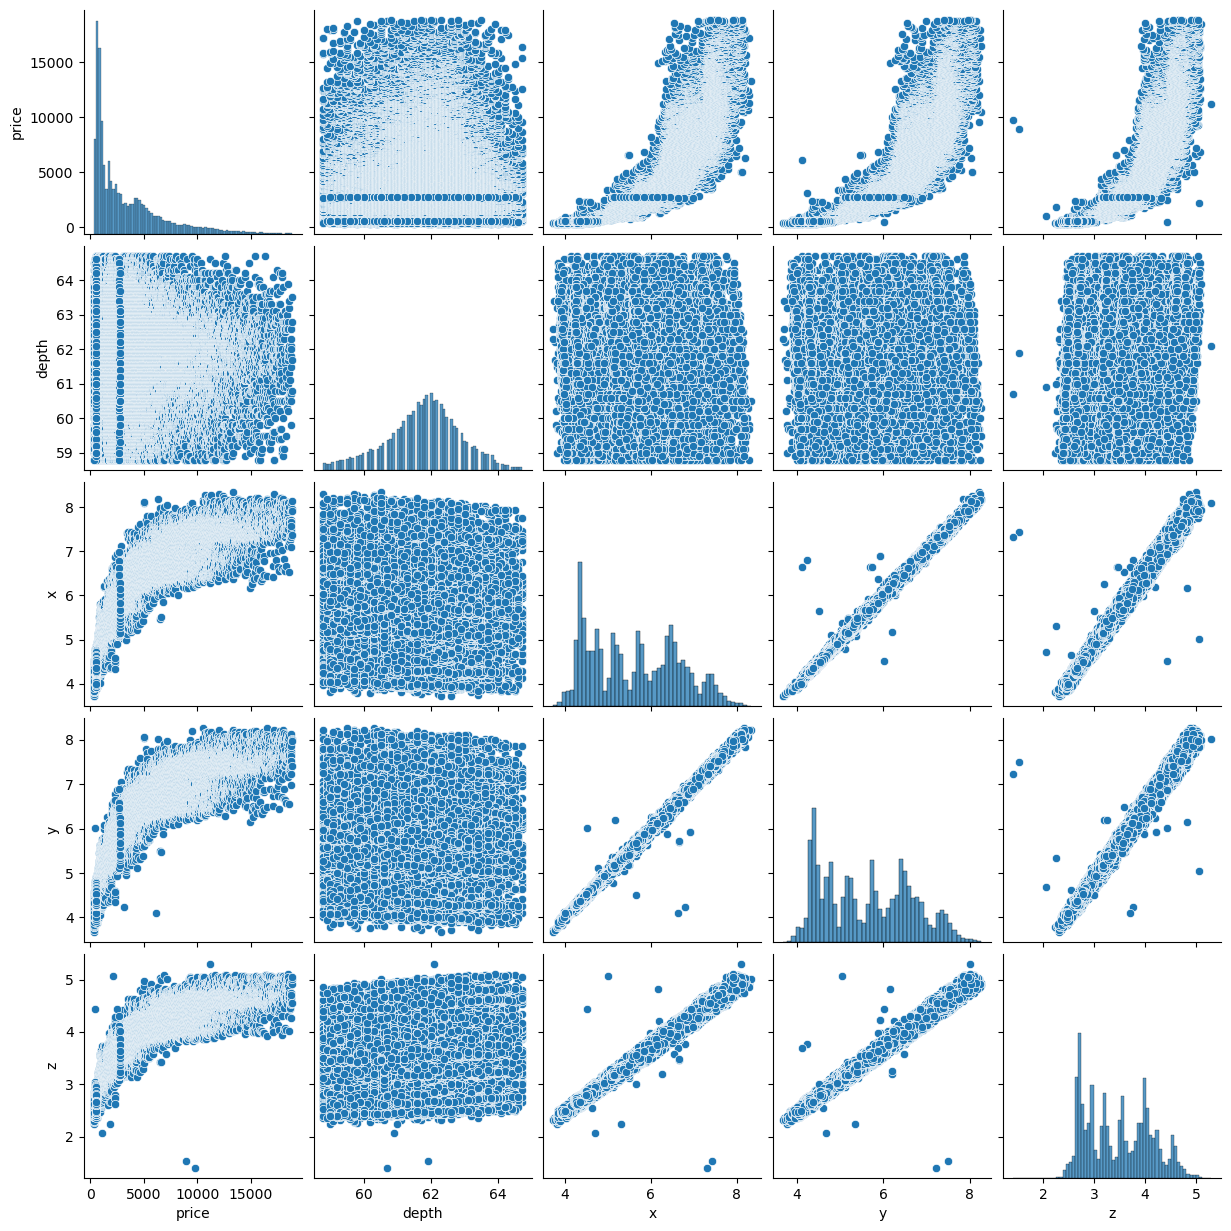

In [38]:
# Построю парные графики рассеяния для переменных price, depth, x, y, z используя sns.pairplot
sns.pairplot(
    df1[[
    'price', 'depth', 'x', 'y', 'z']], 
    diag_kind = 'hist' 
);

In [39]:
# Явная линейная зависимость прослеживается между регрессорами 'x', 'y', 'z' и целевой переменной 'price'
# Мультиколлинеарность прослеживается между признаками x, y, z, что говорит о том, что нельзя включать их вместе в 
# многофакторную регрессию в качестве независимых признаков, так как мультиколлинеарность будет искажать прогнозируемые результаты 

## Задание 3 (1 балл): одномерная линейная регрессия

In [40]:
# Построю линейную регрессию с независимой переменной 'x' - длина бриллианта, и зависимой 'price', так как между ними прослеживаяется сильная линейная зависимость

In [41]:
import statsmodels.formula.api as smf

# создаю модель по заданной формуле и обучаю ее на data при помощи метода .fit()
lm = smf.ols(formula='price ~ x', data=df1).fit()

# выведем полученные коэффициенты модели
lm.params

Intercept   -12869.445078
x             2916.261308
dtype: float64

Интерпретирую полученный коэффициент: при изменении длины бриллианта на 1 мм цена изменится на 3145 долларов США

Предположим, у нас есть некоторый бриллиант со следующими характеристиками:

x = 6.12

Тогда цена по разработанной однофакторной модели будет рассчитываться следующим образом

In [42]:
price = -12869.45+2916.26*6.12

In [43]:
print(f'price = {price}')

price = 4978.0612


## Задание 4 (1 балл): оценка качества модели

In [44]:
# Оценивая качество получившейся модели, посмотрим на коэффициент R^2

In [45]:
lm.predict(df1['x'])

0       -1350.212911
1       -1525.188590
3        -621.147584
4        -212.871001
5       -1379.375525
            ...     
53935    3899.057443
53936    3724.081765
53937    3636.593925
53938    5065.561966
53939    4132.358348
Length: 49666, dtype: float64

In [46]:
ESS = sum((lm.predict(df1['x'])-df1["price"].mean())**2)
TSS = sum((df1["price"]-df1["price"].mean())**2)
r2 = ESS/TSS
r2

0.76433230466843

In [47]:
# регрессионнная модель описывает почти 80% исследуемой выборки, качество получившегося прогноза довольно высокое

In [48]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                 1.611e+05
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        03:17:22   Log-Likelihood:            -4.3882e+05
No. Observations:               49666   AIC:                         8.776e+05
Df Residuals:                   49664   BIC:                         8.777e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.287e+04     41.499   -310.118      0.000    -1.3e+04   -1.28e+04
x           2916.2613      7.266    401.340      0.000    2902.019    2930.503
==============================================================================
Omnibus:                    18066.225   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91331.194
Skew:                           1.696   Prob(JB):                         0.00
Kurtosis:                       8.712   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Рассчитаем MSE для нашей регрессионной модели
MSE = ((df1["price"] - lm.predict(df1["x"]))**2).sum()/df1.shape[0]
MSE

2766215.0135175665

In [50]:
MAE = (abs(df1["price"] - lm.predict(df1["x"]))).sum()/df1.shape[0]
MAE

1183.6043648685975

In [51]:
# Показатели MSE и MAE относительные и используются для сравнения моделей, поэтому делать выводы исходя из значений не является целесообразным

## Задание 5 (1 балл): визуализация прогнозов модели

Поскольку модель у нас линейная, построю график с фактической и прогнозируемой ценой бриллианта.

По оси X отложу выбранный регрессоор, по оси Y — цену бриллианта. Также на тот же график нанесу линию с прогнозом модели.

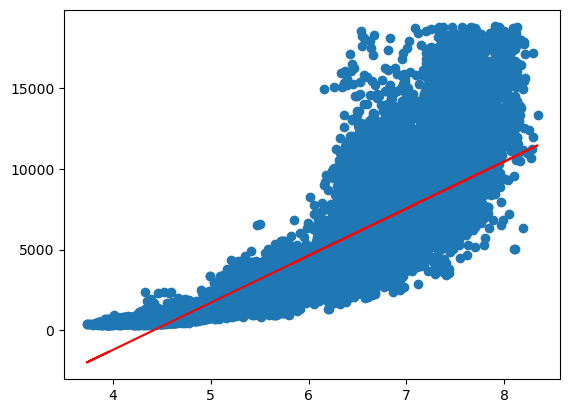

In [52]:
import matplotlib.pyplot as plt
w0 = lm.params.Intercept 
w1 = lm.params.x

plt.scatter(df1['x'], df1['price'])
plt.plot(df1['x'], lm.predict(df1["x"]), color = 'r')

## Задание 6 (2 балла): множественная линейная регрессия

In [53]:
# Построю новую модель прогноза стоимости бриллианта, в которой в качестве регрессоров буду использовать все переменные из задания №2.
lm = smf.ols(formula='price ~ x + y + z + depth', 
             data=df1).fit()

lm.params

Intercept   -15802.577125
x             -321.801712
y             3290.392504
z              -45.549553
depth           45.048179
dtype: float64

In [54]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 4.089e+04
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        03:17:25   Log-Likelihood:            -4.3853e+05
No. Observations:               49666   AIC:                         8.771e+05
Df Residuals:                   49661   BIC:                         8.771e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.58e+04   1072.779    -14.731      0.000   -1.79e+04   -1.37e+04
x           -321.8017    162.499     -1.980      0.048    -640.301      -3.302
y           3290.3925    163.157     20.167      0.000    2970.602    3610.183
z            -45.5496    277.889     -0.164      0.870    -590.216     499.117
depth         45.0482     17.355      2.596      0.009      11.032      79.064
==============================================================================
Omnibus:                    18161.194   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90903.489
Skew:                           1.710   Prob(JB):                         0.00
Kurtosis:                       8.678   Cond. No.                     9.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# Построю новую модель прогноза стоимости бриллианта, в которой в качестве регрессоров буду использовать все переменные из задания №2.

carat = 0.90
depth = 62.7
table = 60
x = 6.12
y = 6.07
z = 3.82

# Цена спрогнозируется следующим образом:

In [56]:
price = lm.params.Intercept+lm.params.x*x+lm.params.y*y+lm.params.z*z+lm.params.depth*depth

In [57]:
print(f'price по новой модели= {price}')

price по новой модели= 4851.200410531024


In [58]:
# Спрогнозированная цена по новой модели на 100 долларов ниже цены спрогнозированной по однофакторной модели.

In [59]:
# Коэффициент детерминации остался на том же уровне (0.76)
# Коэффициент при регрессоре x из задания №3 кардинально уменьшился в значнии и поменял знакс + на -.

## Задание 7 (0.5 балла): подготовка данных для логрегрессии

In [60]:
# Для начала создам новую объясняемую переменную, колонку target, получив её из колонки cut:

# если cut = "Ideal", то target = 1
# иначе, target = -1

df1['target']= df1['cut'].apply(lambda x: 1 if x=='Ideal' else 0)

C:\Users\AcerA3\AppData\Local\Temp\ipykernel_1248\3343439467.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target']= df1['cut'].apply(lambda x: 1 if x=='Ideal' else 0)


In [61]:
# Проверю, правильно ли создалась переменная

df1['target'].value_counts()

0    28613
1    21053
Name: target, dtype: int64

In [62]:
# Оставлю в датафрейме только следующие колонки: target, price, carat, depth, table
df2 = df1.drop(columns = ['x', 'y', 'z', 'cut', 'Unnamed: 0', 'color', 'clarity'], axis=1)

In [63]:
df2 

,carat,depth,table,price,target
0,0.23,61.5,55.0,326,1
1,0.21,59.8,61.0,326,0
3,0.29,62.4,58.0,334,0
4,0.31,63.3,58.0,335,0
5,0.24,62.8,57.0,336,0
...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,1
53936,0.72,63.1,55.0,2757,0
53937,0.70,62.8,60.0,2757,0
53938,0.86,61.0,58.0,2757,0


In [64]:
# делю выборку на обучающую и тестовую выборку в соотношении 3/1

from sklearn.model_selection import train_test_split
np.random.seed(123)

X = df2[['carat', 'depth', 'table', 'price']]
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Задание 8 (1 балл): построение логистической регрессии

In [65]:
# Обучу на тренировочной выборке логистическую регрессию

from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [67]:
print(lr.coef_)

[[-2.15946146e+00  4.24897070e-01 -4.61530641e-01  2.08716301e-04]]


In [68]:
# Для верной интерпретации экспонирую полученные коэффициенты

In [69]:
print(np.exp(lr.coef_[0][0]), np.exp(lr.coef_[0][1]), np.exp(lr.coef_[0][2]), np.exp(lr.coef_[0][3]))

0.11538724531953785 1.5294329870324483 0.6303181158017277 1.0002087380833211


#### Интерпретация полученных коэффициентов

- Коэффициент при переменной carat равен 0.1154, это означает, что с увеличением веса бриллианта в каратах на единицу, вероятность того, что бриллиант имеет идеальную огранку, увеличится на 0.1154.
- Коэффициент при переменной depth равен 1.5294, это означает, что с увеличением соотношения глубины и размера площадки бриллианта в сравнении с диаметром бриллианта на единицу в процентах, вероятность того, что бриллиант имеет идеальную огранку, увеличится на 1.5294.
- Коэффициент при переменной table равен 0.6303, это означает, что с увеличением отношения ширины бриллианта в верхней точке к самой широкой точке на единицу, вероятность того, что бриллиант имеет идеальную огранку, увеличится на 0.6303.
- Коэффициент при переменной price равен 1.0002, это означает, что с увеличением цены бриллианта в долларах США на единицу, вероятность того, что бриллиант имеет идеальную огранку, увеличится на 1.0002. 

## Задание 9 (1.5 балла): метрики логистической регрессии

In [70]:
# На тестовой выборке посчитаю accuracy (долю верных ответов) модели.

In [71]:
test_preds = lr.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
print(f'Accuracy Test', accuracy_score(y_test, test_preds))

Accuracy Test 0.7097986577181208


#### Интерпретация Accuracy_score

Accuracy_score (точность) для логистической регрессии показывает долю верных ответов или, иначе говоря, как много объектов в тестовом наборе данных были классифицированы правильно. Точность для тестовой выборки составила = 0.71, это означает, что 71% объектов в тестовой выборке были классифицированы правильно. 
Таким образом, модель показывает высокую точность на тестовом наборе данных, что может свидетельствовать о хорошей работе модели и отсутствии необходимости переобучения. 

Модель работает лучше константного классификатора, в данном случае константный классификатор не совсем релевантен ввиду того, не учитывает влияние всех различающихся параметров на модель

In [74]:
# Построю ROC-кривую для моей модели, а также посчитаю ROC-AUC

In [75]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

In [76]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


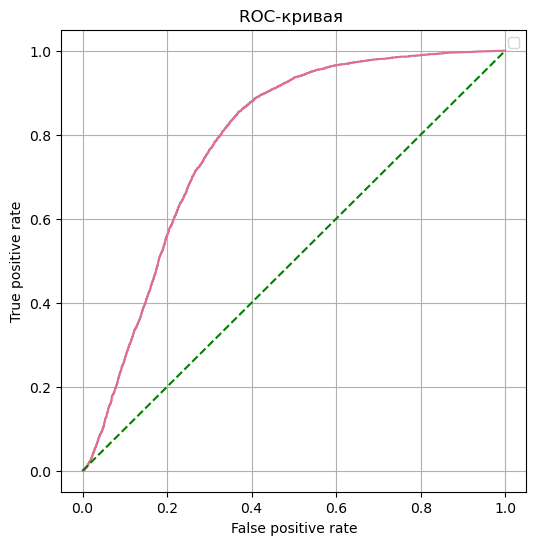

In [77]:
plt.figure(figsize=(6, 6))

plt.title('ROC-кривая ')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.plot(fpr, tpr, color='palevioletred')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.legend()

plt.grid()
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score

In [79]:
print('ROC-AUC на тесте:', roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

ROC-AUC на тесте: 0.7833956285744099


In [80]:
# Значение случайного предсказания ROC-AUC = 0.5, а значение = 1 у идеальной модели. Моя модель неидеальна, но все же предсказывает лучше случайного классификатора